Individual Planning Report:

**1.** Data Description
We have 2 data sets for this project, players.csv which gives information about individual players, and sessions.csv which gives us information about the length of individual play sessions. Both data sets identify players by a hashed email.

**players.csv**:
- Number of rows (players): 196
- Number of variables: 7
    - "experience" | chr | reported experience level of player (Amateur, Regular, Veteran, Pro)
    - "subscribe" | lgl | is the player subscribed to the newsletter
    - "played_hours" | dbl | number of total hours spent playing
    - "name" | chr | players name
    - "gender" | chr | players gender (Male or Female)
    - "age" | dbl | players age 
    - "hashedEmail" | chr | indentifier for players
- Summary Statistics:
    - Mean age = 21.14
    - Mean play time (hours) = 5.85
- Potential issues in data:
    - "experience" is a subjective measure and may not be the most useful do to reporting bias.
    - many low/zero hour played_hours sessions 

**sessions.csv**:
- Number of rows (play sessions): 1535
- Number of variables: 5
  - "start_time" | chr | start time for session in DD/MM/YYYY HH:MM chr format
  - "end_time" | chr |  ending time for session in DD/MM/YYYY HH:MM chr format
  - "original_start_time" | dbl | start time given in numeric form
  - "original_end_time" | dbl | end time given in numeric form 
  - "hashedEmail" | chr | identifies specific player for the session
- Summary Statistics:
  - mean original start = 1.719201e+12
  - mean original end = 1.719196e+12
  - mean duration = 2909328 


2. Research Question

**Can player age and experience predict how many hours they will spend playing?**

Using players.csv, the response variable is played_hours, and exploratory variables are age and experience. 
Because the response variable is quantitative and the predictors include one numeric and one categorical variable, this question is well suited to exploratory visualizations and, later on, a linear regression modeling approach. Only minimal data wrangling is required to prepare these variables for analysis. 

3. Exploratory Data Analysis

4. Methods and Plan

5. Github

In [5]:
library(tidyverse)

In [17]:
players <-read_csv("data/players.csv")
sessions <-read_csv("data/sessions.csv")
nrow(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1535

In [ ]:
3. Exploratory Data Analysis

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


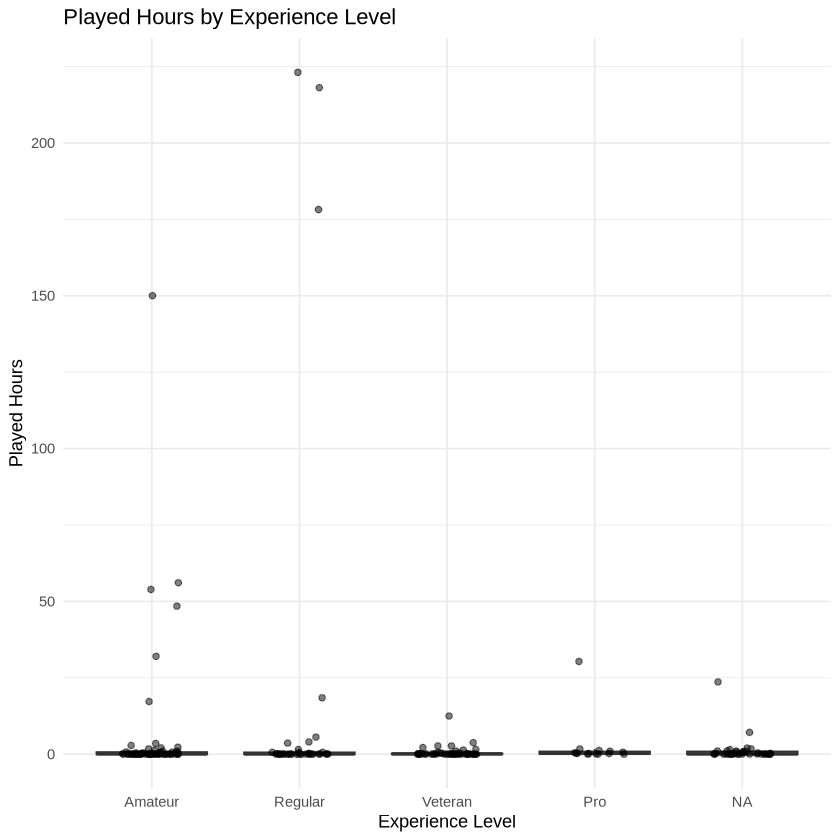

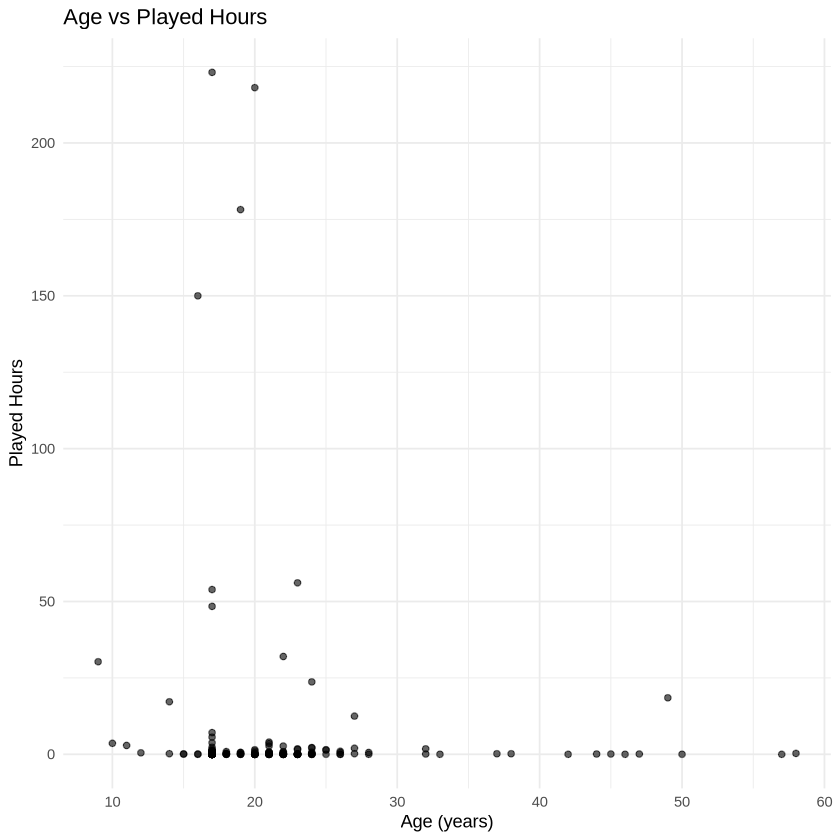

In [46]:
players <- players |>
    mutate(experience = factor(experience, levels = c("Amateur", "Regular", "Veteran", "Pro")))



ggplot(players, aes(x = experience, y = played_hours)) +
  geom_boxplot(fill = "#87CEEB", outlier.shape = NA) +     
  geom_jitter(width = 0.2, alpha = 0.5, size = 1.5) +       
  labs(
    title = "Played Hours by Experience Level",
    x = "Experience Level",
    y = "Played Hours"
  ) +
  theme_minimal()
ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Age vs Played Hours",
    x = "Age (years)",
    y = "Played Hours"
  ) +
  theme_minimal()


In [47]:
players_summary <- players |>
    summarize(mean_age = mean(Age, na.rm = TRUE),
              mean_played_hours = mean(played_hours, na.rm = TRUE))
players_summary
sessions_summary <- sessions |>
    summarize(mean_original_start_time = mean(original_start_time, na.rm = TRUE),
              mean_original_end_time = mean(original_end_time, na.rm = TRUE),
              mean_duration_ms = mean(duration_ms, na.rm = TRUE))
sessions_summary

mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


mean_original_start_time,mean_original_end_time,mean_duration_ms
<dbl>,<dbl>,<dbl>
1.719201e+12,1.719196e+12,2909328


In [ ]:
4. Methods and Plan
To tackle the question of interest, knn-regression makes the most sense as the relationships don't appear to be linear. 
The data will need to be standardized, and can be cross validated to find the best values for k, by comparing RMSE. 